# Cardio Fitness Customers Analysis & Recommendation For Market Targeting. #

---

## Purpose of this project. ##

The objective is to find identify the __customer profile of different treadmill products__ and generate a set of __insight and recommendation__ that will help the company in __targeting new customers__. The following is a documentation of the working process.

## Results summary. ##

The report summary on customer profile and recommendation for targeting new customers can be found in the PDF file named __"cardio_good_fitness_report"__. 

## Table of content. ##

2. Data exploration and familiarisation:
    * [2.1  View the dataset structure and summary.](#View-the-dataset-structure-and-summary.)
    * [2.2  Check columns' definition and data origin.](#Check-columns'-definition-and-data-origin.)
    * [2.3  Visualise the distribution of the numerical data.](#Visualise-the-distribution-of-the-numerical-data.)
    * [2.4  Visualise the distribution of the continuous numerical data.](#Visualise-the-distribution-of-the-continuous-numerical-data.)
    * [2.5  Visualise the correlation between numerical columns.](#Visualise-the-correlation-between-numerical-columns.)
3. Segmentise the dataframe by product categories:
    * [3.1  Calculate the median for each group of product.](#Calculate-the-median-for-each-group-of-product.)
    * [3.2  Summarise the data for 'MonthlyIncome' and 'Miles' for each group of product.](#Summarise-the-data-for-'MonthlyIncome'-and-'Miles'-for-each-group-of-product.)
4. Data analysis and visualisation:
    * [4.1  Investigate the interaction between 'Usage' and 'Miles' for different product's customers.](#Investigate-the-interaction-between-'Usage'-and-'Miles'-for-different-product's-customers.)
    * [4.2  Investigate the interaction between 'Fitness' and 'Usage' for different product's customers.](#Investigate-the-interaction-between-'Fitness'-and-'Usage'-for-different-product's-customers.)
    * [4.3  Investigate the distribution between 'Age' and 'Usage' for different product's customers.](#Investigate-the-distribution-between-'Age'-and-'Usage'-for-different-product's-customers.)
    * [4.4  Investigate the distribution for 'MaritalStatus' for different product's customers.](#Investigate-the-distribution-for-'MaritalStatus'-for-different-product's-customers.)
    * [4.5  Investigate the 'Gender' distribution for different product's customers.](#Investigate-the-'Gender'-distribution-for-different-product's-customers.)
    * [4.6  Investigate the 'MonthlyIncome' distribution vs other columns for different product's customers.](#Investigate-the-'MonthlyIncome'-distribution-vs-other-columns-for-different-product's-customers.)
5. [Summary of results.](#Summary-of-results.)
6. [Notes for future reference.](#Notes-for-future-reference.)

In [1]:
# Import library.
library(pacman)
p_load(readr, dplyr, tidyr, ggplot2, gridExtra)

# Load data. 
fitness_df = read_csv("csv/CardioGoodFitness.csv")

Parsed with column specification:
cols(
  Product = col_character(),
  Age = col_double(),
  Gender = col_character(),
  Education = col_double(),
  MaritalStatus = col_character(),
  Usage = col_double(),
  Fitness = col_double(),
  Income = col_double(),
  Miles = col_double()
)


# Data exploration and familiarisation. # 

## View the dataset structure and summary. ##

Return to [Table of content.](#Table-of-content.)

---

__The overview includes the following:__

1. Check whether the column names have extra spacing to prevent error when writing the names.
2. Check the data types.
3. Check the number of rows and columns.
4. Check the proportion of nulls.
5. Check if there's any duplicated rows. 

In [2]:
# Preview the data.
head(fitness_df, 10)

Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
TM195,18,Male,14,Single,3,4,29562,112
TM195,19,Male,15,Single,2,3,31836,75
TM195,19,Female,14,Partnered,4,3,30699,66
TM195,19,Male,12,Single,3,3,32973,85
TM195,20,Male,13,Partnered,4,2,35247,47
TM195,20,Female,14,Partnered,3,3,32973,66
TM195,21,Female,14,Partnered,3,3,35247,75
TM195,21,Male,13,Single,3,3,32973,85
TM195,21,Male,15,Single,5,4,35247,141
TM195,21,Female,15,Partnered,2,3,37521,85


In [3]:
# View the data structure.
dataset_detail = function(df) {
    na_count = colSums(is.na(df))
    # duplicated_df = fitness_df[duplicated(fitness_df), ]
    
    # Details. 
    columns = colnames(df)
    dtype = sapply(df, class)
    shape = dim(df)
    nulls_proportion = na_count / nrow(df) * 100
    duplicated_nrows = nrow(which(duplicated(df)))
    
    details = list(columns, dtype, shape, nulls_proportion, duplicated_nrows)
    names(details) = c("columns", "dtype", "shape", "nulls_proportion", "duplicated_nrows")
    return(details)
}

dataset_detail(fitness_df)

$columns
[1] "Product"       "Age"           "Gender"        "Education"    
[5] "MaritalStatus" "Usage"         "Fitness"       "Income"       
[9] "Miles"        

$dtype
      Product           Age        Gender     Education MaritalStatus 
  "character"     "numeric"   "character"     "numeric"   "character" 
        Usage       Fitness        Income         Miles 
    "numeric"     "numeric"     "numeric"     "numeric" 

$shape
[1] 180   9

$nulls_proportion
      Product           Age        Gender     Education MaritalStatus 
            0             0             0             0             0 
        Usage       Fitness        Income         Miles 
            0             0             0             0 

$duplicated_nrows
NULL

---
__Findings:__

1. The column names also contain no extra spacing.
2. `Product`, `Gender`, and `MaritalStatus` should be categorical data, so I will transform them into `factor`.
3. This is a very small dataset with 180 rows and 9 columns. 
4. No null. 
5. No duplicated row.

---

### Transform data types and summarise the data. ###

Return to [Table of content.](#Table-of-content.)

In [4]:
# Transform dtypes.
fitness_df$Product = as.factor(fitness_df$Product)
fitness_df$Gender = as.factor(fitness_df$Gender)
fitness_df$MaritalStatus = as.factor(fitness_df$MaritalStatus)

In [5]:
# View the summary of the dataset.
summary(fitness_df)

  Product        Age           Gender      Education       MaritalStatus
 TM195:80   Min.   :18.00   Female: 76   Min.   :12.00   Partnered:107  
 TM498:60   1st Qu.:24.00   Male  :104   1st Qu.:14.00   Single   : 73  
 TM798:40   Median :26.00                Median :16.00                  
            Mean   :28.79                Mean   :15.57                  
            3rd Qu.:33.00                3rd Qu.:16.00                  
            Max.   :50.00                Max.   :21.00                  
     Usage          Fitness          Income           Miles      
 Min.   :2.000   Min.   :1.000   Min.   : 29562   Min.   : 21.0  
 1st Qu.:3.000   1st Qu.:3.000   1st Qu.: 44059   1st Qu.: 66.0  
 Median :3.000   Median :3.000   Median : 50596   Median : 94.0  
 Mean   :3.456   Mean   :3.311   Mean   : 53720   Mean   :103.2  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.: 58668   3rd Qu.:114.8  
 Max.   :7.000   Max.   :5.000   Max.   :104581   Max.   :360.0  

## Check columns' definition and data origin. ##

Return to [Table of content.](#Table-of-content.)

---

__Provided data dictionary:__

1. Product - The model no. of the treadmill.
2. Age - In no of years, of the customer.
3. Gender - Of the customer.
4. Education - In no. of years, of the customer.
5. Marital Status - Of the customer.
6. Usage - Avg. # times the customer wants to use the treadmill every week. 
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - Of the customer, by annual.
9. Miles- Expected to run. 1 miles == 1.609 km. 

__Findings:__

1. The data doesn't seem to contain any error. All the range of values are appropriate. However I might have to do a double check on the difference between `Age` and `Education` to see if it contains inappropriate value.
2. The income is calculated by annual. I will transform it into month instead to make it easier for me to analyse. 
3. Miles are calculated either by month/year, because it doesn't make sense to divide the maximum miles directly by the no. of `Usage` since it will be about 90miles or 144km per day. It is unclear whether it is by calculated by month or year, so I will have to keep this in mind when doing analysis and mining insight. 

---

### Check whether the difference between 'Age' and 'Education' contains inappropriate value. ###

In [6]:
# Compute the difference.
fitness_df[, "Age_Education_Diff"] = fitness_df$Age - fitness_df$Education

# Check the rows.
fitness_df[fitness_df[, "Age_Education_Diff"] < 5, ]

# Remove 'Age_Education_Diff' column. 
fitness_df = fitness_df[, -10]

Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Education_Diff
TM195,18,Male,14,Single,3,4,29562,112,4
TM195,19,Male,15,Single,2,3,31836,75,4
TM798,22,Male,18,Single,4,5,48556,200,4


---
__Findings:__

The __minimum difference between age and education is 4__. I assume that the `Education` year count begins at grade 1 and not kindergarden else there won't be just 3 kids starting school at the age of 4. Perhaps it is not impossible to have kids taking grade 1 at the age of 4, so I will not take it as an error. 

---
### Rescale 'Income' column from annual to monthly. ###

In [7]:
# Rescale 'Income' column from annual to monthly.
fitness_df[, "MonthlyIncome"] = fitness_df$Income / 12

# Preview.
head(fitness_df, 10)

# Remove 'Income' column.
fitness_df = fitness_df[, -8]

Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,MonthlyIncome
TM195,18,Male,14,Single,3,4,29562,112,2463.50
TM195,19,Male,15,Single,2,3,31836,75,2653.00
TM195,19,Female,14,Partnered,4,3,30699,66,2558.25
TM195,19,Male,12,Single,3,3,32973,85,2747.75
TM195,20,Male,13,Partnered,4,2,35247,47,2937.25
TM195,20,Female,14,Partnered,3,3,32973,66,2747.75
TM195,21,Female,14,Partnered,3,3,35247,75,2937.25
TM195,21,Male,13,Single,3,3,32973,85,2747.75
TM195,21,Male,15,Single,5,4,35247,141,2937.25
TM195,21,Female,15,Partnered,2,3,37521,85,3126.75


---
### View the summary of the data after some processing. ###

In [8]:
summary(fitness_df)

  Product        Age           Gender      Education       MaritalStatus
 TM195:80   Min.   :18.00   Female: 76   Min.   :12.00   Partnered:107  
 TM498:60   1st Qu.:24.00   Male  :104   1st Qu.:14.00   Single   : 73  
 TM798:40   Median :26.00                Median :16.00                  
            Mean   :28.79                Mean   :15.57                  
            3rd Qu.:33.00                3rd Qu.:16.00                  
            Max.   :50.00                Max.   :21.00                  
     Usage          Fitness          Miles       MonthlyIncome 
 Min.   :2.000   Min.   :1.000   Min.   : 21.0   Min.   :2464  
 1st Qu.:3.000   1st Qu.:3.000   1st Qu.: 66.0   1st Qu.:3672  
 Median :3.000   Median :3.000   Median : 94.0   Median :4216  
 Mean   :3.456   Mean   :3.311   Mean   :103.2   Mean   :4477  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:114.8   3rd Qu.:4889  
 Max.   :7.000   Max.   :5.000   Max.   :360.0   Max.   :8715  

## Visualise the distribution of the numerical data. ##

Return to [Table of content.](#Table-of-content.)

---

- Discrete numerical data are `Age`, `Education`, `Usage`, `Fitness`. 
- Continuous numerical data are `Income`, `Miles`. 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

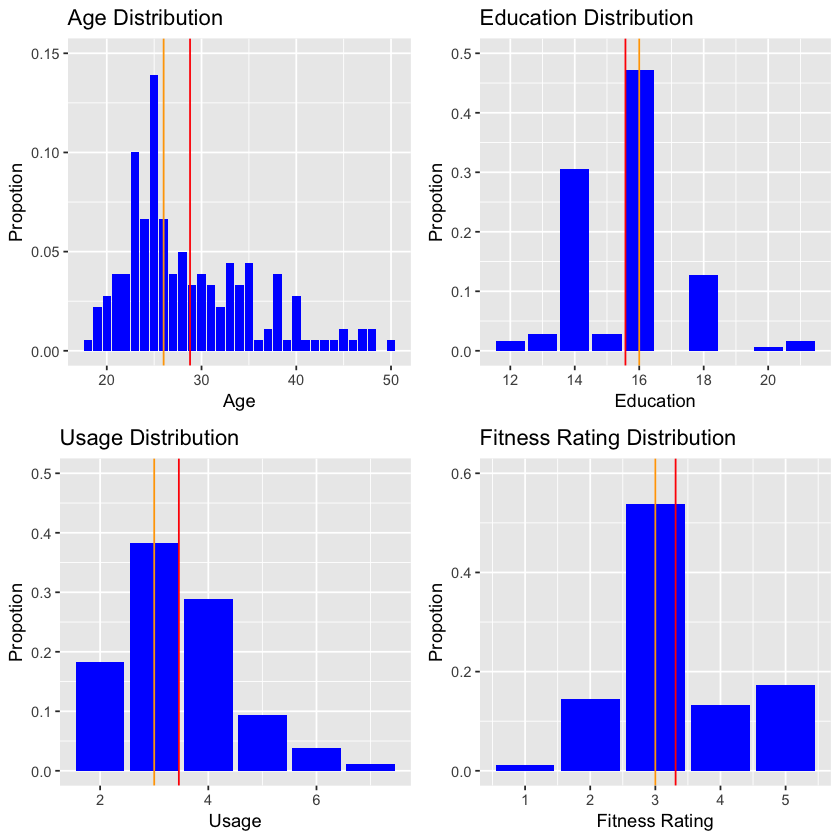

In [9]:
# Plot the distribution + mean (red) + median (orange).
barplot_age = ggplot(data=fitness_df) +
    aes(x=Age) +
    labs(title="Age Distribution", x="Age", y="Propotion") +
    ylim(0, .15) + 
    geom_histogram(aes(y=..count../sum(..count..)), stat="count", fill='blue') + 
    geom_vline(xintercept=mean(fitness_df$Age), color="red") +
    geom_vline(xintercept=median(fitness_df$Age), color="orange")

barplot_education = ggplot(data=fitness_df) +
    aes(x=Education) +
    labs(title="Education Distribution", x="Education", y="Propotion") +
    ylim(0, .50) +
    geom_histogram(aes(y=..count../sum(..count..)), stat="count", fill='blue') +
    geom_vline(xintercept=mean(fitness_df$Education), color="red") +
    geom_vline(xintercept=median(fitness_df$Education), color="orange")

barplot_usage = ggplot(data=fitness_df) +
    aes(x=Usage) +
    labs(title="Usage Distribution", x="Usage", y="Propotion") +
    ylim(0, .50) +
    geom_histogram(aes(y=..count../sum(..count..)), stat="count", fill='blue') +
    geom_vline(xintercept=mean(fitness_df$Usage), color="red") +
    geom_vline(xintercept=median(fitness_df$Usage), color="orange")

barplot_fitness = ggplot(data=fitness_df) +
    aes(x=Fitness) +
    labs(title="Fitness Rating Distribution", x="Fitness Rating", y="Propotion") +
    ylim(0, .60) +
    geom_histogram(aes(y=..count../sum(..count..)), stat="count", fill='blue') +
    geom_vline(xintercept=mean(fitness_df$Fitness), color="red") +
    geom_vline(xintercept=median(fitness_df$Fitness), color="orange")

discrete_numerical_dist = grid.arrange(barplot_age, barplot_education, barplot_usage, barplot_fitness, 
                                       nrow=2, ncol=2)
# ggsave(file="images/discrete_numerical_dist.png", discrete_numerical_dist, width=12, height=10)

---
__Findings:__

1. `Age`, `Usage`, `Edducation`, and `Fitness` are all skewed distribution. 
2. Most of the distribution for `Age` data seems to be between __20—35__. The range is too wide to cover from 18—50, so narrowing down to the common range helps to target the customers more effectively. I can visualise the cumulative distribution to observe the rate of change of the curve or find the interquartile range to set a cut off point. 
3. `Education` has multi-modal, __14, 16, and 18__, which is about __87%__ in total. 16 and 18 years of education probably means that the customers are generally bachelor or master holders. My assumption is that college or university students would probably not purchase a treadmill since they might already have the facility provided by the college or university. Perhaps I can explore further on this later.
4. For `Usage` data, about __90%__ of the customers use treadmill __2—4__ times a week on average. Running 3—4 times a week on average should be considered as frequent. They are most likely fitness maintainers. 
5. For `Fitness` data, around __83%__ of the customers rate themselves with __3 or above__. About __53%__ who rate themselves __3__ are probably __ordinary runners__. About __30%__ customers who rate themselves __4 or above__ are probably __avid or above-average marathon runners__. I assume that customers who rate __2 or below__ are probably teenage runners (age below 22) or "old" runners (age above 45) since old adults might be less conscious/concern about fitness. Perhaps I can explore further on this later. 

---

### Find the 90% interval for 'Age' via quantiles. ###

In [10]:
lower_interval = quantile(fitness_df$Age, 0.05)
upper_interval = quantile(fitness_df$Age, 0.95) 

c(lower_interval, upper_interval)

5%   95% 
20.00 43.05

---
### Visualise the cumulative distribution of the 'Age' data to observe the rate of change. ###

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

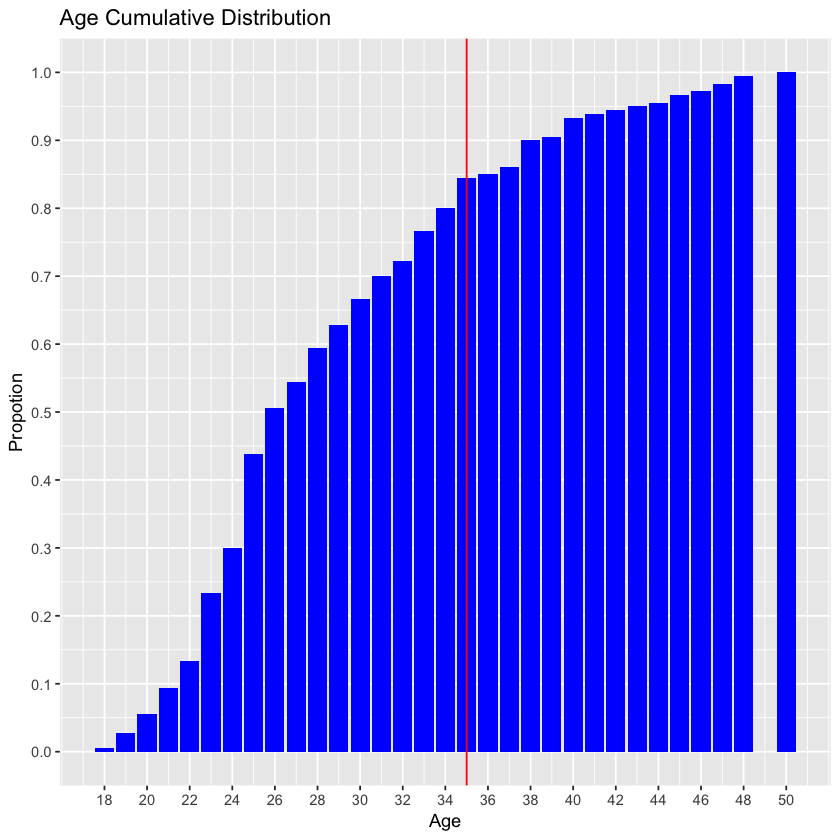

In [11]:
# Plot the cumulative distribution.
cum_barplot_age = ggplot(data=fitness_df) +
    aes(x=Age) +
    labs(title="Age Cumulative Distribution", x="Age", y="Propotion") +
    ylim(0, 1) + 
    scale_x_continuous(breaks=seq(18, 50, by=2)) +
    scale_y_continuous(breaks=seq(0, 1, by=.1)) +
    geom_histogram(aes(y=cumsum(..count..)/sum(..count..)), stat="count", fill='blue') +
    geom_vline(xintercept=35, color="red")

# ggsave(file="images/cum_barplot_age.png", cum_barplot_age, width=7, height=5)
cum_barplot_age

---
__Findings from 3.2 and 3.3 sections:__

After observing the graph, I decided to cut off at age 35 since there are __85%__ of the customers aged between __20 to 35__. The market is large enough to focus on this range. Looking back at the __'Fitness Rating Distribution'__ from 2.1 section, it seems to further suggest that old adults are less conscious/concern about fitness. Either the assumption is true or old adults mostly prefer other brand of treadmill from other companies than the available products we have.

## Visualise the distribution of the continuous numerical data. ##

Return to [Table of content.](#Table-of-content.)

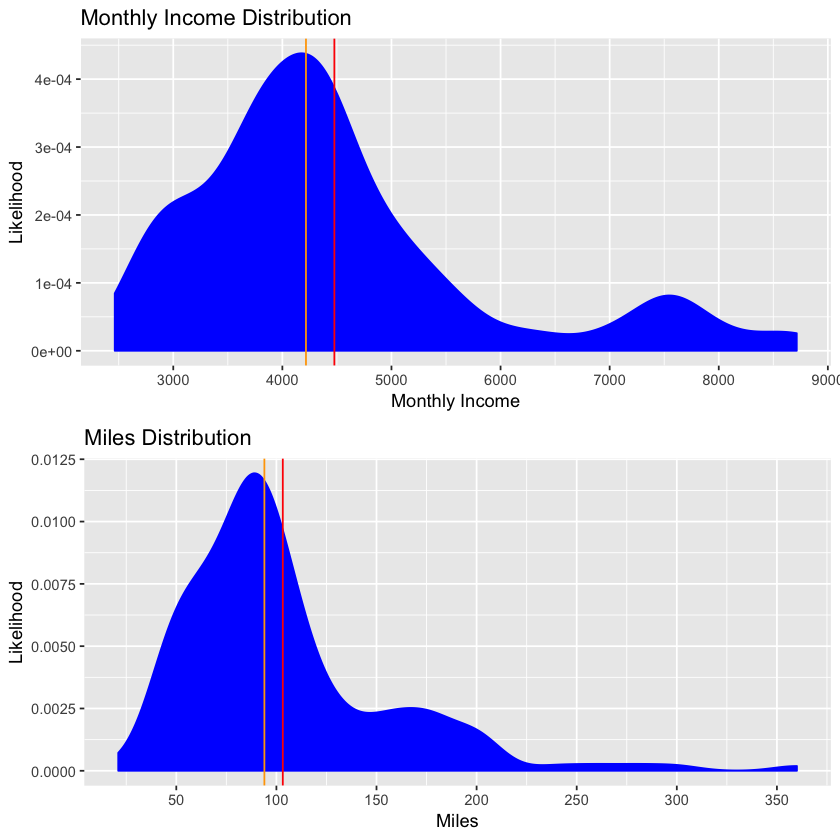

In [12]:
# Plot the distribution + mean (red) + median (orange).
density_income = ggplot(data=fitness_df) +
    aes(x=MonthlyIncome) +
    labs(title="Monthly Income Distribution", x="Monthly Income", y="Likelihood") +
    scale_x_continuous(breaks=seq(0, 9000, by=1000)) +
    geom_density(fill='blue', color='blue') +
    geom_vline(xintercept=mean(fitness_df$MonthlyIncome), color="red") +
    geom_vline(xintercept=median(fitness_df$MonthlyIncome), color="orange")

# Plot the distribution + mean (red) + median (orange).
density_miles = ggplot(data=fitness_df) +
    aes(x=Miles) +
    labs(title="Miles Distribution", x="Miles", y="Likelihood") +
    scale_x_continuous(breaks=seq(0, 400, by=50)) +
    geom_density(fill='blue',  color='blue') + 
    geom_vline(xintercept=mean(fitness_df$Miles), color="red") +
    geom_vline(xintercept=median(fitness_df$Miles), color="orange")

continuous_numerical_dist = grid.arrange(density_income, density_miles, nrow=2)
# ggsave(file="images/continuous_numerical_dist.png", continuous_numerical_dist, width=12, height=10)

---
### Visualise the median and interquartile range of the 'Miles' and 'MonthlyIncome'. ###

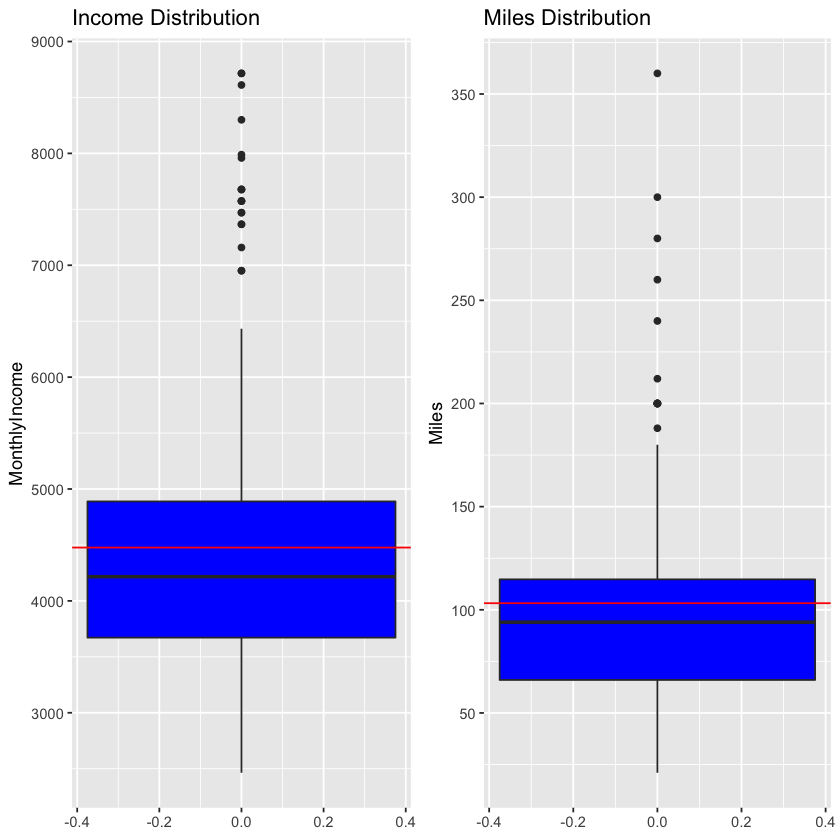

In [13]:
# Plot the distribution + mean (red).
boxplot_income = ggplot(data=fitness_df) +
    aes(y=MonthlyIncome) +
    labs(title="Income Distribution") +
    scale_y_continuous(breaks=seq(0, 9000, by=1000)) +
    geom_boxplot(fill='blue') +
    geom_hline(yintercept=mean(fitness_df$MonthlyIncome), color="red")

boxplot_miles = ggplot(data=fitness_df) +
    aes(y=Miles) +
    labs(title="Miles Distribution") +
    scale_y_continuous(breaks=seq(0, 400, by=50)) +
    geom_boxplot(fill='blue') + 
    geom_hline(yintercept=mean(fitness_df$Miles), color="red")

continuous_numerical_boxplot = grid.arrange(boxplot_income, boxplot_miles, ncol=2)
# ggsave(file="images/continuous_numerical_boxplot.png", continuous_numerical_boxplot, width=12, height=10)

---
### Find the median and interquartile range of the 'Miles' and 'MonthlyIncome'. ###

In [14]:
summary(fitness_df[, c("MonthlyIncome", "Miles")])

 MonthlyIncome      Miles      
 Min.   :2464   Min.   : 21.0  
 1st Qu.:3672   1st Qu.: 66.0  
 Median :4216   Median : 94.0  
 Mean   :4477   Mean   :103.2  
 3rd Qu.:4889   3rd Qu.:114.8  
 Max.   :8715   Max.   :360.0  

---
__Findings from 3.4 section:__

1. Both `Miles` and `MonthlyIncome` are heavily skewed. 
2. The interquartile range is between __3,650—4,900__. Above __6,500__ is considered as outliers. It seems like most customers aren't high income earners. 
3. The interquartile range is between __66—115 miles__. Above __180 miles__ are considered as outliers. Since I can't determine whether the miles are calculated by month or year, it's a bit difficult to gain deeper insight into this. The only insight I have is that the  outliers are likely referring __avid or above-average marathon runners__. 

Let see what percentage of the customers (outliers) who earn above 6,500 or run more than 180 miles.

---
### Identify the outliers for 'MonthlyIncome' and 'Miles'. ###

In [15]:
# Percentage of customers with 'MonthlyIncome' above 6,500.
cat("'MonthlyIncome' above 6,500: ", 
    nrow(fitness_df[fitness_df$MonthlyIncome > 6500, ]) / nrow(fitness_df) * 100, "\n")

# Percentage of customers with 'Miles' above 180.
cat("'Miles' above 180: ", nrow(fitness_df[fitness_df$Miles > 180, ]) / nrow(fitness_df) * 100)

'MonthlyIncome' above 6,500:  10.55556 
'Miles' above 180:  7.222222

---
__Findings:__

1. About __10.5%__ of the customers earn above 6,500. 
2. About __7.2%__ of the customers ran above 180 miles who are probably extreme runners. This can a potential market to expand on if the market for the proportion of extreme runners are large enough compare to the total population in that city or country. 

---
## Visualise the correlation between numerical columns. ##

Return to [Table of content.](#Table-of-content.)

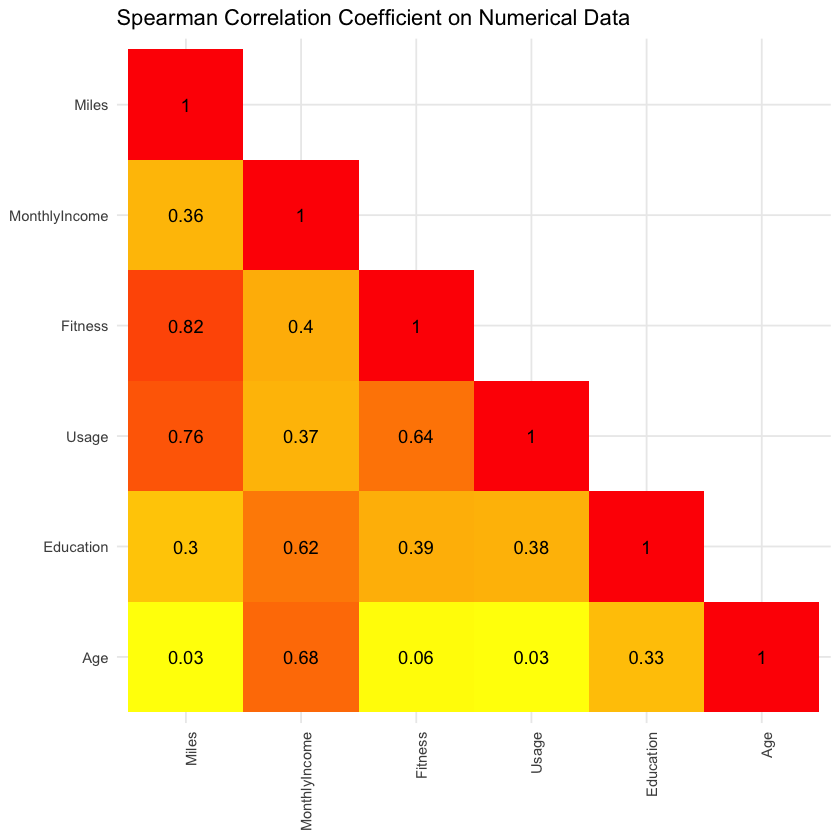

In [16]:
# Plot correlation heatmap.
corr_heatmap = function(df) {
    # Taking the lower triangle of the correlation matrix
    corr_up = df
    corr_up[lower.tri(corr_up)] = NA
    corr_up = data.frame(corr_up)

    # Preparing the dataframe for heatmaps 
    col_names = colnames(corr_up)

    corr_up_heat = corr_up %>%
        gather(key=x) %>%
        group_by(x) %>%
        mutate(y=col_names[row_number()])  %>%
        na.omit

    # Ordering triangle
    ordered_cols_asc = col_names[order(colSums(is.na(corr_up)))]
    ordered_cols_desc = col_names[order(-colSums(is.na(corr_up)))]

    corr_up_heat = corr_up_heat %>%
        ungroup() %>%
        mutate(x=factor(x,levels=ordered_cols_asc)) %>%
        mutate(y=factor(y,levels=ordered_cols_desc))

    # Plotting heatmaps
    g = ggplot(data=corr_up_heat, aes(x=x, y=y, fill=value)) + 
        geom_tile() + 
        geom_text(aes(label=value)) +
        labs(title="Spearman Correlation Coefficient on Numerical Data") +
        theme_minimal() +
        scale_fill_gradientn(colours=c("white", "yellow", "red"), values=c(-1,0,1)) +
        theme(legend.position="none",
              axis.title.y=element_blank(),
              axis.title.x=element_blank(),
              axis.text.x=element_text(angle=90, hjust=1))

    # Returning the plot
    return(g)
}

# Use the method 'Spearman' because the data are non-parametric. 
numerical_corr_heatmap = fitness_df %>% 
  select("Age", "Education", "Usage", "Fitness", "MonthlyIncome", "Miles") %>% 
  cor(method="spearman") %>%
  round(2) %>%
  corr_heatmap()
  
# ggsave(file="images/numerical_corr_heatmap.png", numerical_corr_heatmap, width=12, height=10)
numerical_corr_heatmap

---
__Findings from correlation that are above 60%:__

1. `Usage` is __64% positively correlated__ to `Fitness`. Customers who run more often are likely to perceive themselves fitter than those who run lesser. 
2. `Usage` is __76% positively correlated__ to `Miles`. Customers with higher number of average usage per week usually have higher total running distance. 
3. `Fitness` is __82% positively correlated__ to `Miles`. People who run a lot and longer are very likely to perceive themselves as fitter than those who run lesser.
4. `Education` is __62% positively correlated__ to `MonthlyIncome`. 
5. `Age` is __68% positively correlated__ to `MonthlyIncome`. 

__To summarise the correlation:__ 

1. `Usage`, `Fitness`, and `Miles` follow the same pattern, which means they probably follow the same result or insight when doing bivariate analysis with other columns. 
2. `Education` and `Age` when interact with `MonthlyIncome` follow the same pattern as well with roughly 65% correlation.

# Segmentise the dataframe by product categories. #

In [17]:
# Segmentise the dataframe so I can analyse the data separately later.
fitness_df_TM798 = fitness_df[fitness_df$Product == "TM798", ]
fitness_df_TM498 = fitness_df[fitness_df$Product == "TM498", ]
fitness_df_TM195 = fitness_df[fitness_df$Product == "TM195", ]

## Calculate the median for each group of product. ##

Return to [Table of content.](#Table-of-content.)

In [18]:
fitness_df %>%
  group_by(Product) %>%
  summarise(
    median_age=median(Age),
    median_usage=median(Usage),
    median_fitness=median(Fitness),
    median_income=median(MonthlyIncome),
    median_miles=median(Miles)
  )

Product,median_age,median_usage,median_fitness,median_income,median_miles
TM195,26,3,3,3884.750,85
TM498,26,3,3,4121.625,85
TM798,27,5,5,6380.708,160


## Summarise the data for 'MonthlyIncome' and 'Miles' for each group of product. ##

Return to [Table of content.](#Table-of-content.)

In [19]:
# Product TM798
summary(fitness_df_TM798[, c("MonthlyIncome", "Miles")])

 MonthlyIncome      Miles      
 Min.   :4046   Min.   : 80.0  
 1st Qu.:4850   1st Qu.:120.0  
 Median :6381   Median :160.0  
 Mean   :6287   Mean   :166.9  
 3rd Qu.:7574   3rd Qu.:200.0  
 Max.   :8715   Max.   :360.0  

In [20]:
# Product TM498
summary(fitness_df_TM498[, c("MonthlyIncome", "Miles")])

 MonthlyIncome      Miles       
 Min.   :2653   Min.   : 21.00  
 1st Qu.:3743   1st Qu.: 64.00  
 Median :4122   Median : 85.00  
 Mean   :4081   Mean   : 87.93  
 3rd Qu.:4453   3rd Qu.:106.00  
 Max.   :5590   Max.   :212.00  

In [21]:
# Product TM195
summary(fitness_df_TM195[, c("MonthlyIncome", "Miles")])

 MonthlyIncome      Miles       
 Min.   :2464   Min.   : 38.00  
 1st Qu.:3222   1st Qu.: 66.00  
 Median :3885   Median : 85.00  
 Mean   :3868   Mean   : 82.79  
 3rd Qu.:4453   3rd Qu.: 94.00  
 Max.   :5685   Max.   :188.00  

---
__Findings from 4.1 and 4.2 sections:__

1. Looking at the median and interquartiles on `Fitness`, `Usage`, `MonthlyIncome`, and `Miles`, it seems like TM798 customers are significantly different from TM498 and TM195 customers.
2. TM498 and TM195 customers might share the same distribution. Even if there's a difference, the difference (effect size) is likely insignificant. 

`Fitness`, `Usage`, `MonthlyIncome`, and `Miles` are more able to differentiate TM798 customers from the rest. In order to identify the product TM798 customers profile, I will make use of these columns to locate the clusters.

# Data analysis and visualisation. #

## Investigate the interaction between 'Usage' and 'Miles' for different product's customers. ##

Return to [Table of content.](#Table-of-content.)

---
### Visualise the relationship between 'Usage' and 'Miles' for different product's customers. ###

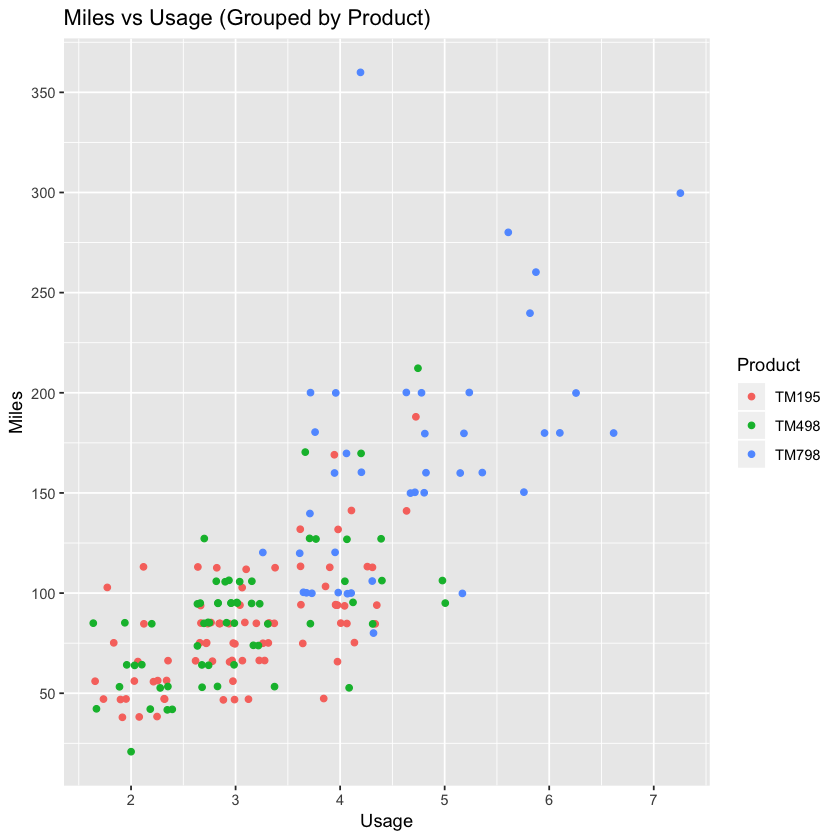

In [22]:
corr_usage_miles_groupby_product = ggplot(data=fitness_df) +
    aes(x=Usage, y=Miles, color=Product) +
    labs(title="Miles vs Usage (Grouped by Product)") +
    scale_y_continuous(breaks=seq(0, 400, by=50)) +
    scale_x_continuous(breaks=seq(0, 7, by=1)) +
    geom_jitter()

# ggsave(file="images/corr_usage_miles_groupby_product.png", corr_usage_miles_groupby_product, width=7, height=5)
corr_usage_miles_groupby_product

---
### Visualise the 'Miles' distribution for different product's customers. ###

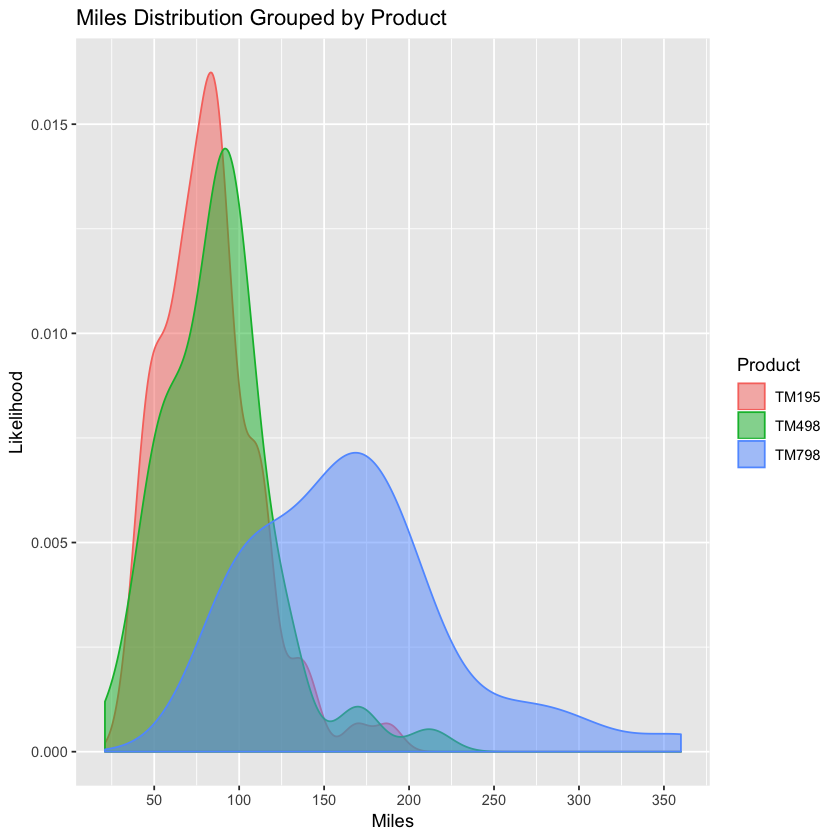

In [23]:
density_miles_groupby_product = ggplot(data=fitness_df) +
    aes(x=Miles, color=Product, fill=Product) +
    labs(title="Miles Distribution Grouped by Product", x="Miles", y="Likelihood") +
    scale_x_continuous(breaks=seq(0, 400, by=50)) +
    geom_density(alpha=.5) 

# ggsave(file="images/density_miles_groupby_product.png", density_miles_groupby_product, width=7, height=5)
density_miles_groupby_product

---
#### Calculate the proportion of different product's customers who run above 100 and 200 miles. ####

In [24]:
# Calculate the proportion of customers who run above 200 miles.
cat("TM798, Percentage above 200 miles: ", 
    sum(fitness_df_TM798$Miles >= 200) / nrow(fitness_df_TM798) * 100, "\n")

# Calculate the proportion of customers who run above 100 miles.
cat("TM798, Percentage above 100 miles: ", 
    sum(fitness_df_TM798$Miles >= 100) / nrow(fitness_df_TM798) * 100)

TM798, Percentage above 200 miles:  27.5 
TM798, Percentage above 100 miles:  97.5

In [25]:
# Calculate the proportion of customers who run above 200 miles.
cat("TM498, Percentage above 200 miles: ", 
    sum(fitness_df_TM498$Miles >= 200) / nrow(fitness_df_TM498) * 100, "\n")

# Calculate the proportion of customers who run above 100 miles.
cat("TM498, Percentage above 100 miles: ", 
    sum(fitness_df_TM498$Miles >= 100) / nrow(fitness_df_TM498) * 100)

TM498, Percentage above 200 miles:  1.666667 
TM498, Percentage above 100 miles:  26.66667

In [26]:
# Calculate the proportion of customers who run between above 200 miles.
cat("TM195, Percentage above 200 miles: ", 
    sum(fitness_df_TM195$Miles >= 200) / nrow(fitness_df_TM195) * 100, "\n")

# Calculate the proportion of customers who run between above 100 miles.
cat("TM195, Percentage above 100 miles: ", 
    sum(fitness_df_TM195$Miles >= 100) / nrow(fitness_df_TM195) * 100)

TM195, Percentage above 200 miles:  0 
TM195, Percentage above 100 miles:  22.5

---
__Findings from 4.1.2 section:__

1. __97.5%__ of the TM798 customers run above __100 miles__. While __27.5%__ of the TM798 customers run __above 200 miles__. This suggests that TM798 customers are predominantly __avid or above-average marathon runners__. 
2. __26.6%__ of the product TM498 customers run a total of __100 miles__ and above. Only __1.7%__ run above 200 miles. 
3. __22.5%__ of the product TM195 customers run a total of __100 miles__ and above. 

---
### Visualise the 'Usage' distribution for different product's customers. ###

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

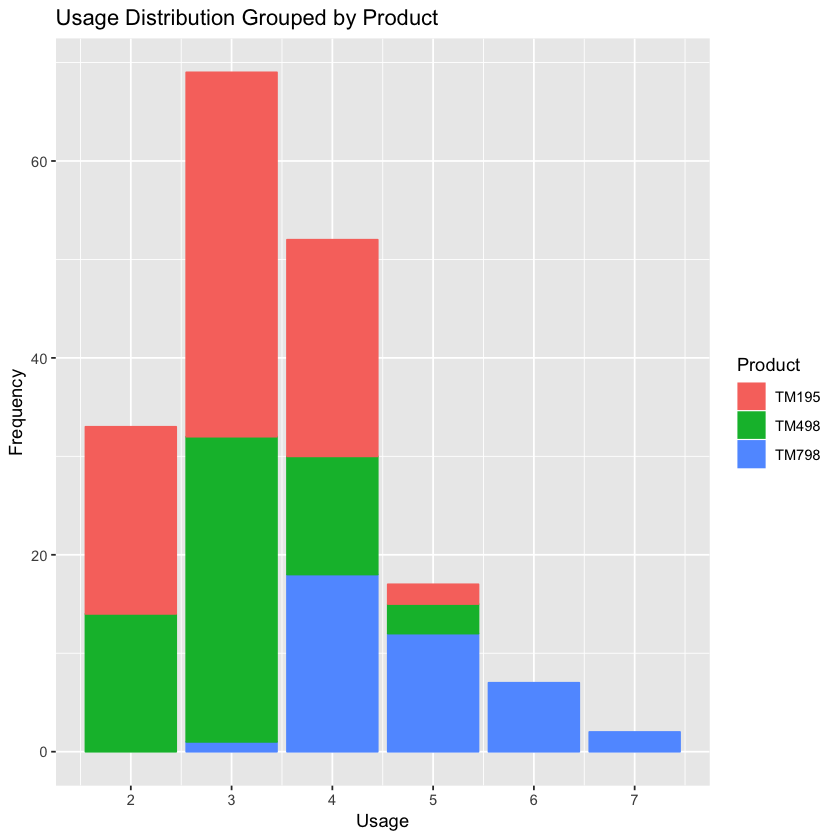

In [27]:
barplot_usage_groupby_product = ggplot(data=fitness_df) +
    aes(x=Usage, color=Product, fill=Product) +
    labs(title="Usage Distribution Grouped by Product", x="Usage", y="Frequency") +
    scale_x_continuous(breaks=seq(0, 7, by=1)) +
    geom_histogram(stat="count") 

# ggsave(file="images/barplot_usage_groupby_product.png", barplot_usage_groupby_product, width=7, height=5)
barplot_usage_groupby_product

---
### Calculate the proportion of each unique value for 'Usage'. ###

In [28]:
# Product TM798.
summary(as.factor(fitness_df_TM798$Usage)) / nrow(fitness_df_TM798) * 100

# Product TM498.
summary(as.factor(fitness_df_TM498$Usage)) / nrow(fitness_df_TM498) * 100

# Product TM195.
summary(as.factor(fitness_df_TM195$Usage)) / nrow(fitness_df_TM195) * 100

3    4    5    6    7 
 2.5 45.0 30.0 17.5  5.0

2        3        4        5 
23.33333 51.66667 20.00000  5.00000

2     3     4     5 
23.75 46.25 27.50  2.50

---
__Findings:__

Product TM798: 
1. __45%__ of the customers use treadmill __4 times per week on average__.
2. __52.5%__ of the customers use treadmill __5—7 times per week on average__.

Product TM498:
1. __20%__ of the customers use treadmill __4 times per week on average__.
2. Only __5%__ of the customers use treadmill __5 times per week on average__.

Product TM195:
1. __28.8%__ of the customers use treadmill __4 times per week on average__.
2. Only __2.5%__ of the customers use treadmill __5 times per week on average__. 

---
### Summary for 4.1 section. ###
    
__Product TM798 customers__ are mostly __intense and frequent runners__ (running 4—7 times per week and longer miles) while other products such __TM498 and TM195__ are generally __average runners__ (2—4 times per week and shorter miles).

---
## Investigate the interaction between 'Fitness' and 'Usage' for different product's customers. ##

Return to [Table of content.](#Table-of-content.)

---

### Visualise the relationship between 'Fitness' and 'Usage' for different product's customers. ###

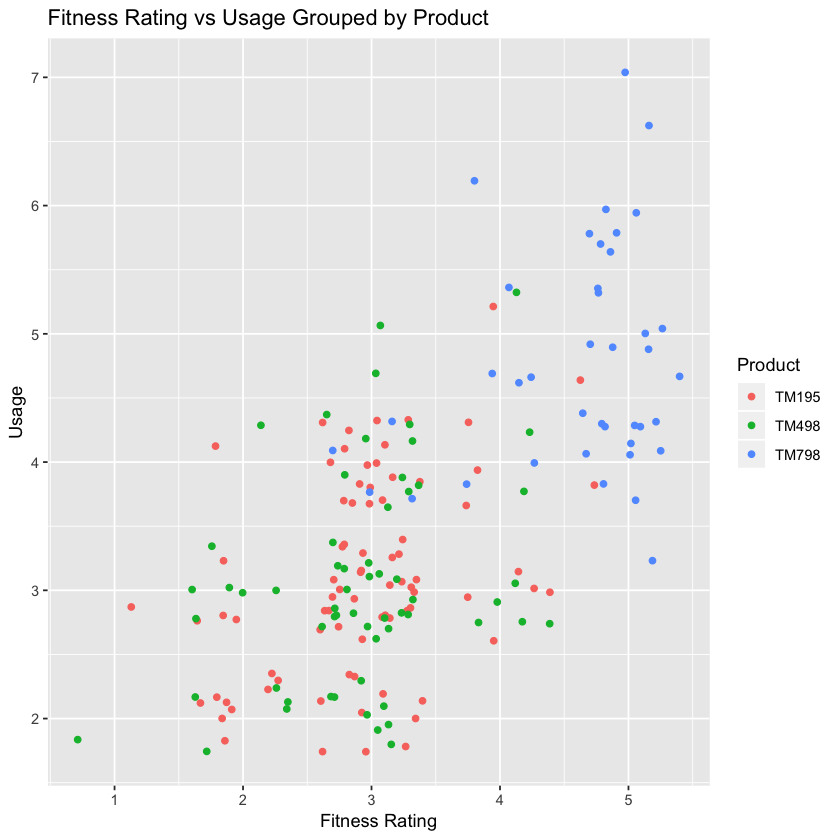

In [29]:
cluster_fitness_vs_usage_groupby_product = ggplot(data=fitness_df) +
    aes(x=Fitness, y=Usage, color=Product, fill=Product) +
    labs(title="Fitness Rating vs Usage Grouped by Product", x="Fitness Rating", y="Usage") +
    scale_y_continuous(breaks=seq(0, 7, by=1)) +
    geom_jitter() 

# ggsave(file="images/cluster_fitness_vs_usage_groupby_product.png", 
#        cluster_fitness_vs_usage_groupby_product, width=7, height=5)
cluster_fitness_vs_usage_groupby_product

---
### Visualise the 'Fitness' distribution for different product's customers. ###

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

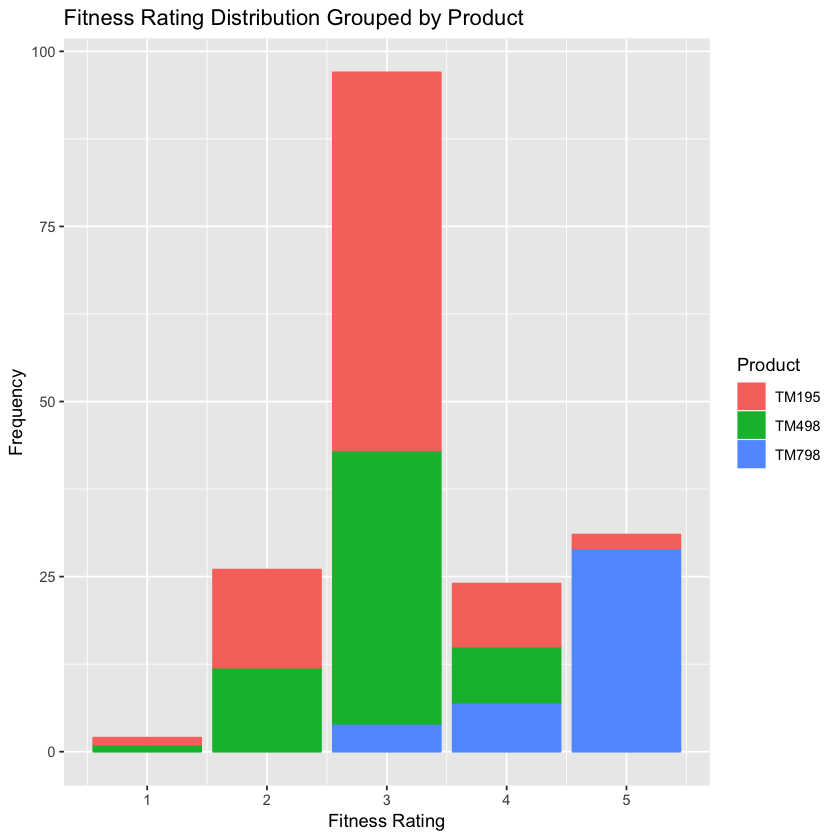

In [30]:
barplot_fitness_groupby_product = ggplot(data=fitness_df) +
    aes(x=Fitness, color=Product, fill=Product) +
    labs(title="Fitness Rating Distribution Grouped by Product", x="Fitness Rating", y="Frequency") +
    geom_histogram(stat="count") 

# ggsave(file="images/barplot_fitness_groupby_product.png", barplot_fitness_groupby_product, width=7, height=5)
barplot_fitness_groupby_product

---
#### Calculate the proportion of customers who rate themselves 5 for fitness level. ####

In [31]:
# Product TM798.
summary(as.factor(fitness_df_TM798$Fitness)) / nrow(fitness_df_TM798) * 100

# Product TM498.
summary(as.factor(fitness_df_TM498$Fitness)) / nrow(fitness_df_TM498) * 100

# Product TM195.
summary(as.factor(fitness_df_TM195$Fitness)) / nrow(fitness_df_TM195) * 100

3    4    5 
10.0 17.5 72.5

1         2         3         4 
 1.666667 20.000000 65.000000 13.333333

1     2     3     4     5 
 1.25 17.50 67.50 11.25  2.50

---
__Findings from 5.2:__

1. Looking at the barplot, __72.5%__ of the product TM798 customers preceive themselves as __very fit__ (rating of 5).
2. About __65%__ of other product's customers generally perceive themselves as __neutrally fit__ (rating of 3).

---
### Summary for 5.0 section. ###

TM798 customers who use treadmill very often naturally perceived themselves as __fitter than average runners__. These customers who run very often also tend to __run longer miles__. 

---
## Investigate the distribution between 'Age' and 'Usage' for different product's customers. ##

Return to [Table of content.](#Table-of-content.)

---

### Visualise the distribution between 'Age' and 'Usage' for different product's customers. ###

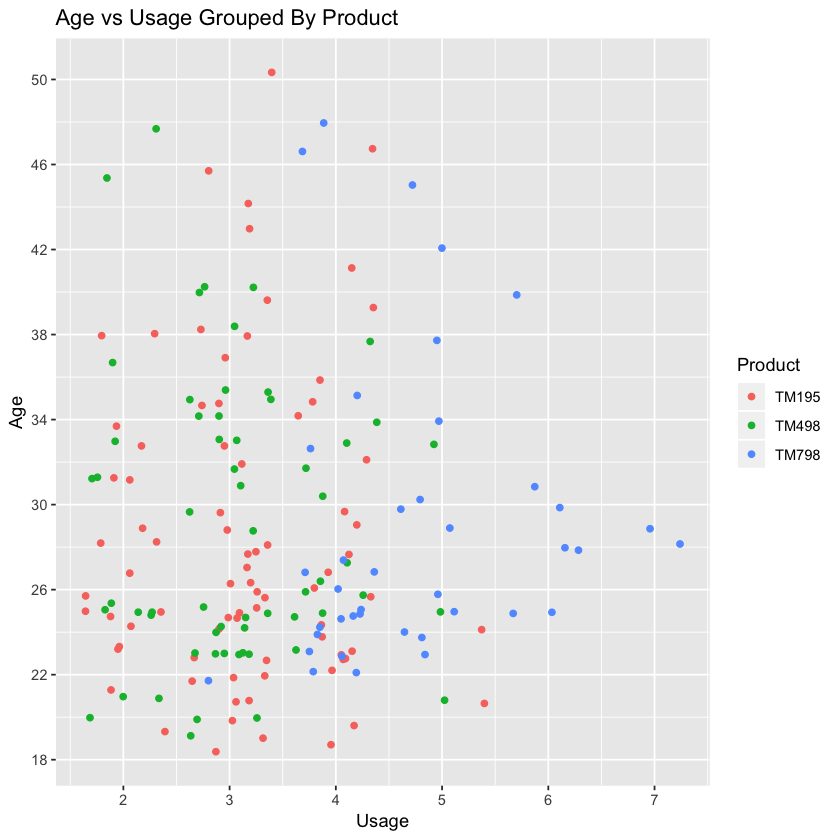

In [32]:
cluster_age_vs_usage_groupby_product = ggplot(data=fitness_df) +
    aes(x=Usage, y=Age, color=Product) +
    labs(title="Age vs Usage Grouped By Product") +
    scale_y_continuous(breaks=seq(18, 50, by=4)) +
    scale_x_continuous(breaks=seq(0, 7, by=1)) +
    geom_jitter()

# ggsave(file="images/cluster_age_vs_usage_groupby_product.png", 
#        cluster_age_vs_usage_groupby_product, width=7, height=5)
cluster_age_vs_usage_groupby_product

---
__Findings:__

1. Most TM798 customers seem to concentrate on age between __22—35__. 
2. TM498 and TM195 customers have __larger spread__ than TM798 customers, __ranging from 18—40__. 

---
#### Calculate the proportion of customers who are below certain age. ####

In [33]:
# Calculate the proportion of each customers aged below 31.
cat("TM798, Percentage of customers below 31: ", 
    sum(fitness_df_TM798$Age <= 35) / nrow(fitness_df_TM798) * 100, "\n")

# Calculate the proportion of each customers aged below 35.
cat("TM498, Percentage of customers below 35: ", 
    sum(fitness_df_TM498$Age <= 40) / nrow(fitness_df_TM498) * 100, "\n")

# Calculate the proportion of each customers aged below 35.
cat("TM195, Percentage of customers below 35: ", 
    sum(fitness_df_TM195$Age <= 40) / nrow(fitness_df_TM195) * 100, "\n")

TM798, Percentage of customers below 31:  85 
TM498, Percentage of customers below 35:  96.66667 
TM195, Percentage of customers below 35:  92.5 


---

### Summary for 4.3 section. ###

1. __85%__ of the product TM798 customers mostly __aged between 22—35__. This group of customers have specific and narrower range of market when it comes to age. 
2. The rest of the product's customers are mostly __age between 18—40__. This group of customers have broader range of market, which probably means the product TM498 and TM195 are catered for average or general runners. 

---
## Investigate the distribution for 'MaritalStatus' for different product's customers. ##

Return to [Table of content.](#Table-of-content.)

---

### Calculate the proportion of customers who are partnered and single for different product's customers. ###

In [34]:
# Product TM798.
summary(fitness_df_TM798$MaritalStatus) / nrow(fitness_df_TM798) * 100

# Product TM498. 
summary(fitness_df_TM498$MaritalStatus) / nrow(fitness_df_TM498) * 100

# Product TM195.
summary(fitness_df_TM195$MaritalStatus) / nrow(fitness_df_TM195) * 100

Partnered    Single 
     57.5      42.5

Partnered    Single 
       60        40

Partnered    Single 
       60        40

---
### Summary for 4.4 section. ###

There nothing insightful on how the `MartialStatus` affect the customers' preference on various product. 

---
## Investigate the 'Gender' distribution for different product's customers. ##

Return to [Table of content.](#Table-of-content.)

---

### Visualise the 'Gender' distribution for different product's customers. ###

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

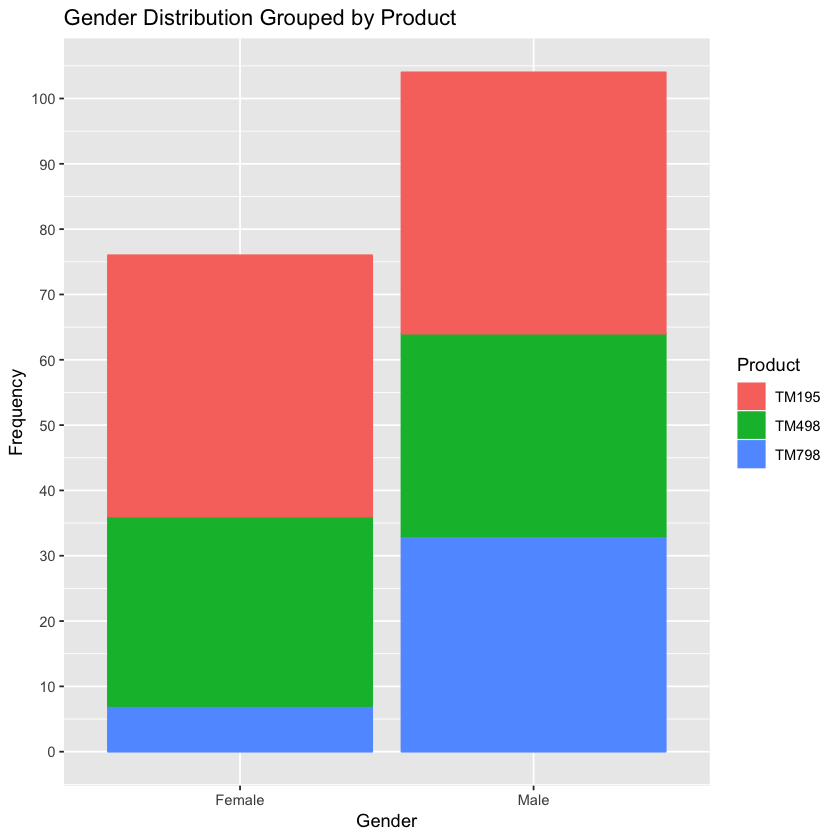

In [35]:
barplot_gender_groupby_product = ggplot(data=fitness_df) +
    aes(x=Gender, color=Product, fill=Product) +
    labs(title="Gender Distribution Grouped by Product", x="Gender", y="Frequency") +
    scale_y_continuous(breaks=seq(0, 100, by=10)) +
    geom_histogram(stat="count") 

# ggsave(file="images/barplot_gender_groupby_product.png", barplot_gender_groupby_product, width=7, height=5)
barplot_gender_groupby_product

---
#### Calculate the proportion of the male and female that uses product TM798. ####

In [36]:
# Product TM798.
summary(as.factor(fitness_df_TM798$Gender)) / nrow(fitness_df_TM798) * 100

Female   Male 
  17.5   82.5

---
### Summary for 4.5 section. ###

1. __82.5%__ of the customer uses __TM798__ are predominantly male compare to female which is only __17.5%__.
2. Other types of the products seem to be equally balanced.

---
## Investigate the 'MonthlyIncome' distribution vs other columns for different product's customers. ##

Return to [Table of content.](#Table-of-content.)

---

### Visualise the 'MonthlyIncome' distribution for different product's customers. ###

Warning message:
“Ignoring unknown parameters: bins”

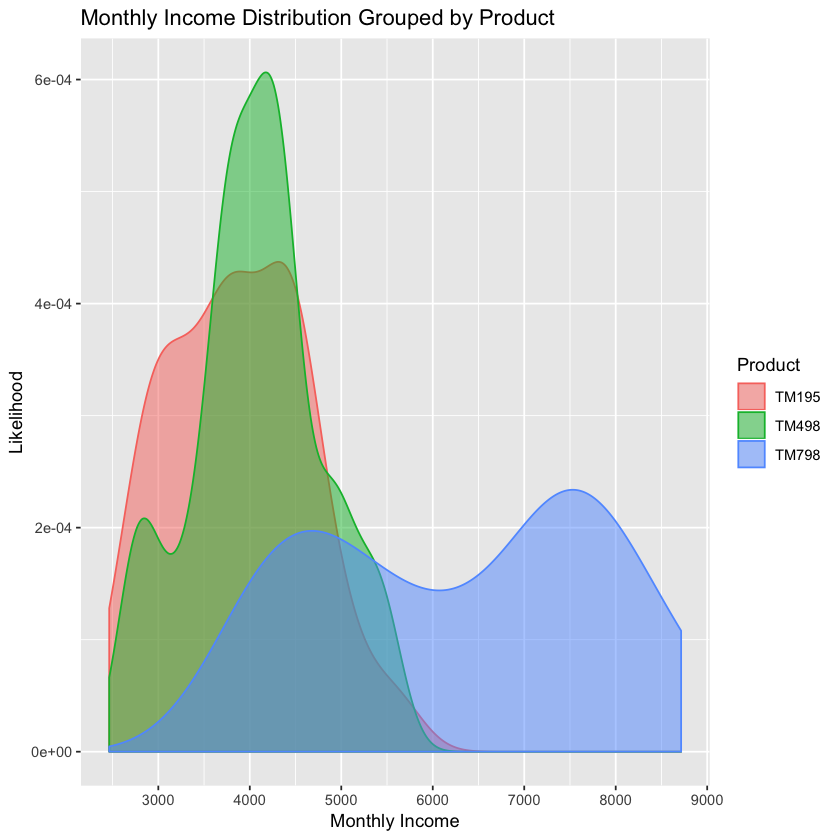

In [37]:
density_income_groupby_product = ggplot(data=fitness_df) +
    aes(x=MonthlyIncome, color=Product, fill=Product) +
    labs(title="Monthly Income Distribution Grouped by Product", x="Monthly Income", y="Likelihood") +
    scale_x_continuous(breaks=seq(0, 9000, by=1000)) +
    geom_density(alpha=.5, bins=30) 

# ggsave(file="images/density_income_groupby_product.png", density_income_groupby_product, width=7, height=5)
density_income_groupby_product

---
### Visualise 'MonthlyIncome' vs 'Fitness' for different product's customers. ###

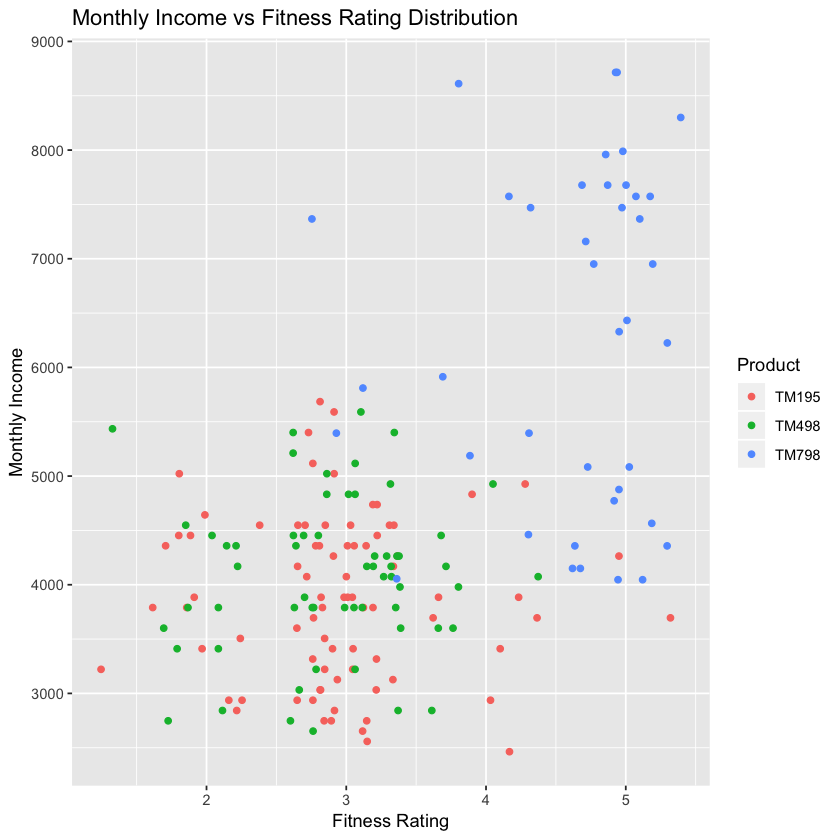

In [38]:
cluster_fitness_vs_income = ggplot(data=fitness_df) +
    aes(x=Fitness, y=MonthlyIncome, color=Product) +
    labs(title="Monthly Income vs Fitness Rating Distribution", x="Fitness Rating", y="Monthly Income") +
    scale_y_continuous(breaks=seq(0, 9000, by=1000)) +
    geom_jitter() 

# ggsave(file="images/cluster_fitness_vs_income.png", cluster_fitness_vs_income, width=7, height=5)
cluster_fitness_vs_income

---
### Visualise 'MonthlyIncome' vs 'Usage' for different product's customers. ###

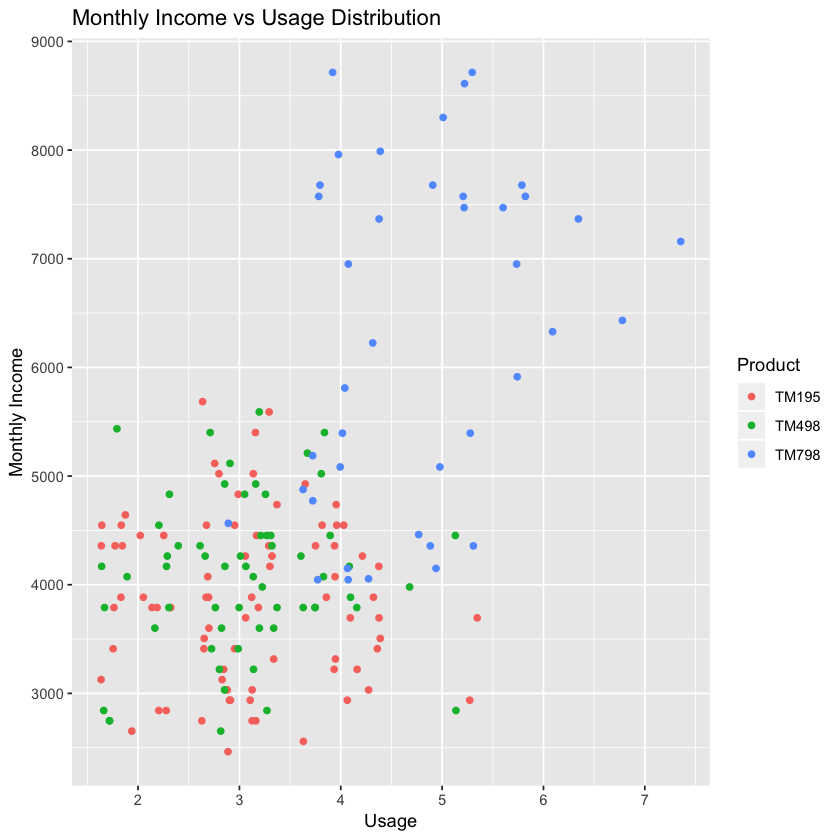

In [39]:
cluster_usage_vs_income = ggplot(data=fitness_df) +
    aes(x=Usage, y=MonthlyIncome, color=Product) +
    labs(title="Monthly Income vs Usage Distribution", x="Usage", y="Monthly Income") +
    scale_y_continuous(breaks=seq(0, 9000, by=1000)) +
    scale_x_continuous(breaks=seq(0, 7, by=1)) +
    geom_jitter() 

# ggsave(file="images/cluster_usage_vs_income.png", cluster_usage_vs_income, width=7, height=5)
cluster_usage_vs_income

---
### Visualise 'MonthlyIncome' vs 'Age' for different product's customers. ###

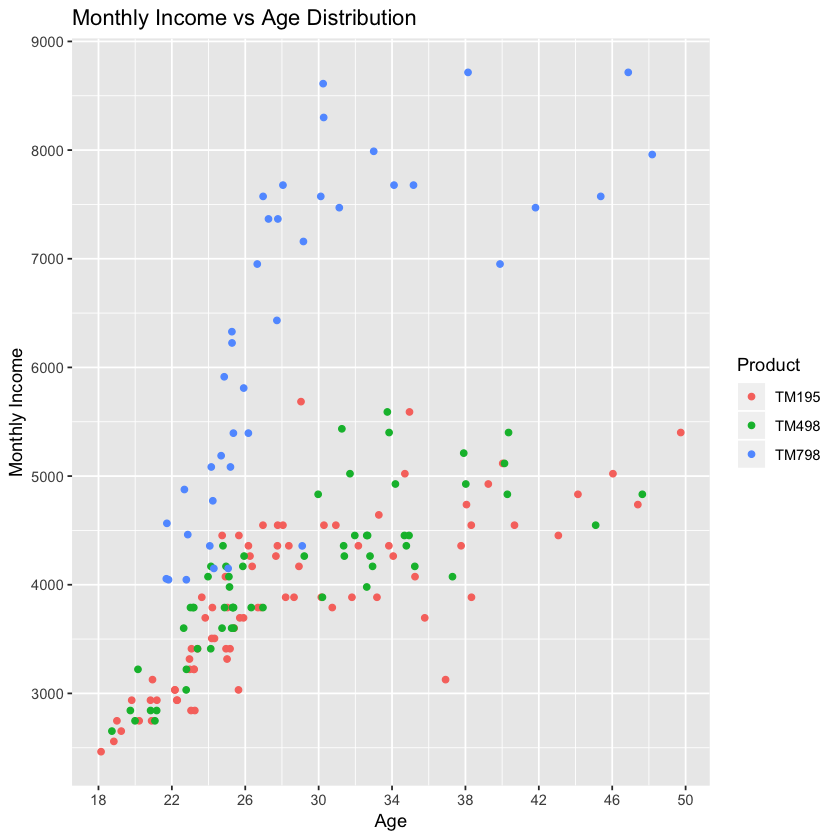

In [40]:
cluster_age_vs_income = ggplot(data=fitness_df) +
    aes(x=Age, y=MonthlyIncome, color=Product) +
    labs(title="Monthly Income vs Age Distribution", x="Age", y="Monthly Income") +
    scale_y_continuous(breaks=seq(0, 9000, by=1000)) +
    scale_x_continuous(breaks=seq(18, 50, by=4)) +
    geom_jitter() 

# ggsave(file="images/cluster_age_vs_income.png", cluster_age_vs_income, width=7, height=5)
cluster_age_vs_income

---
### Visualise 'MonthlyIncome' vs 'Education' for different product's customers. ###

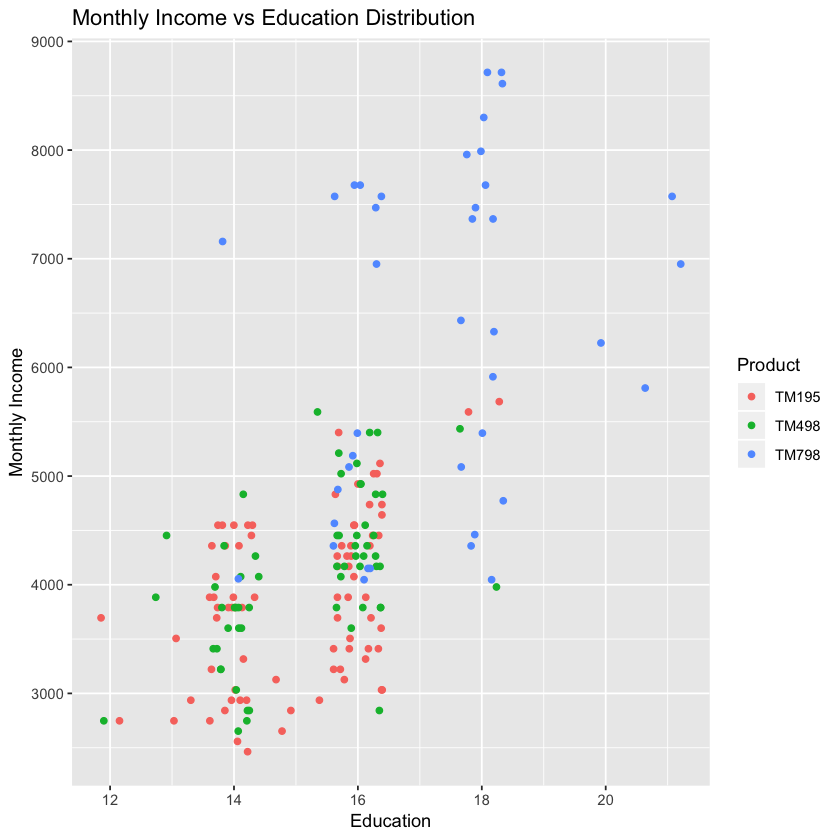

In [41]:
cluster_income_vs_education = ggplot(data=fitness_df) +
    aes(x=Education, y=MonthlyIncome, color=Product) +
    labs(title="Monthly Income vs Education Distribution", x="Education", y="Monthly Income") +
    scale_y_continuous(breaks=seq(0, 9000, by=1000)) +
    geom_jitter() 

# ggsave(file="images/cluster_income_vs_education.png", cluster_income_vs_education, width=7, height=5)
cluster_income_vs_education

---
### Summary for 4.6 section. ###

Product TM798 customers generally __earn higher income__ (perhaps due to better education or smarter) than customers of other products. This group of customers are mostly between __age 22—31__, __fitter__, and __above-average runners__. It also seems like high income customers tend to __enjoy or invest themselves in aerobic exercise__ like running. Besides the intention to maintain fitness, they also like to __challenge and train themselves__. 

---

# Summary of results. #

The report summary on customer profile and recommendation for targeting new customers can be found in the PDF file named __"cardio_good_fitness_report"__. 

---

# Notes for future reference. #

Latest update: __2019/12/10__

__List of things to take note:__

- This is a small sample data, but for the sake of quick analysis, I did not include the tolerance interval for the median and proportion. Hence, have to keep that in mind when reading the computed estimators. 
- I haven't explore further on `MaritalStatus` column because I assume that the data doesn't contribute much insight. 
- This dataset might be a fake dataset and has no actual context. No actual products, company, competitors... 
- I don't know whether the `Miles` column is calculated monthly/yearly, so I can't explore further on this. Finding out how long a customer run per day might paint a clearer picture about the customer profile. 

Return to [Table of content.](#Table-of-content.)